Disclaimer: 
There are a lot of places in this code where you need to define paths for input files and output files. There are also a lot of places where you need to name dataframes and variables. You will need to do all of this for whatever you're using as a species/data. This is just what I've used for this project. 

Also, I am by no means good at programming. This code is ugly but worked for me. I'm happy to answer questions if you ahve them but I want to be upfront that you're about to read some ugly code! Enjoy! :) 


#Import libraries 

In [2]:


#matplotlib for plotting
import matplotlib.pyplot as plt

#Import matplotlib with the right font type for pdfs so they can be edited in Illustrator
import matplotlib as mpl 
mpl.rcParams['pdf.fonttype'] = 42

# Enable inline plotting
%matplotlib inline

#pandas for working with dataframes
import pandas as pd 
from pandas import DataFrame, read_csv

#numpy
import numpy as np

#csv reader
import csv

#For colors!
import palettable as pal


#for the linear regressions
from scipy import stats
import pylab
from mpl_toolkits.mplot3d import Axes3D


/Users/eleanorbors/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module PIL was already imported from /Users/eleanorbors/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/PIL/__init__.pyc, but /Users/eleanorbors/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


#Define input file and distance dictionary 

In [3]:
#File path to stacks summary statistics output 
file_path = '/Users/eleanorbors/Desktop/Analysis/Lionfish_Stacks_Files/stacks_1.35/batch_9/populations_p8_r80/batch_9.sumstats.tsv'

###Three different options for distance dictionary: 
#Euclidian distances calcuated in Google Earth (straight lines between Lat/Long coordinates)
euclid_dist_dic = {'FLO':0.0, 'BAH':406, 'USV':1816, 'DOM':1409, 'JAM':885, 'CAY':678, 'MEX':906, 'HON':1222, 'BEL':1148}
#GIS through-ocean distances (calculated by CAM)--shortest distance through water
ocean_dist_dic = {'FLO':0.0, 'BAH':409.01, 'USV':1816.4, 'DOM':1518.2, 'JAM':1303.79, 'CAY':1084.9, 'MEX':889.1, 'HON':1266.5, 'BEL':1127.8}
#Dictionary with GIS through-ocean data modified to go around the East side of Cuba
modified_ocean_dist_dic = {'FLO':0.0, 'BAH':409.015, 'USV':1816.4, 'DOM':1518.20, 'JAM':1303.79, 'CAY':1556.56, 'MEX':2122.87, 'HON':2180.68, 'BEL':2239.69}

#Define Colors
colors = {'CAY': '#F46D43', 'BEL': '#ABDDA4', 'DOM': '#5E4FA2', 'HON': '#FEE08B', 'NC': '#FF7F00', 'USV': '#FFFFBF', 
          'JAM': '#3288BD', 'FLO': '#4A4A4A', 'LIS': '#CAB2D6', 'BER': '#6A3D9A', 'MEX': '#FDAE61', 'BAH': '#9E0142'}


#Define Functions 

###make_sum_stats_dataframe
The function 'make_sum_stats_dataframe' generates a summary statistcs dataframe from the STACKS output **before any filtering**. Inputs are (1) the input file path defined above; (2) the name you'd like to give the main sumstats dataframe ('a string'); (3) the number of populations in the dataset, default is 9. 

###locus_count_check
The function 'locus_count_check' will check if there is indeed only one SNP considered per tag/locus.  Essentially, it checks that '--write_single_snp' or '--write_random_snp' was run in STACKS.

###subset_flip_flop_loci
The function 'subset_flip_flop_loci' will identify loci that switch from major to minor allele in at least one population in the dataset. It will return a *dictionary* that contains both a dataframe of the loci that do flip-flop and those that do note flip flop. (To call the items in the dictionary, make the function equal to a dictionary you can call later.) 

###find_frequency_differences
The function 'find_frequency_differences' finds loci for which there is an absolute difference between the max and min allele frequencies of *at least* the defined cutoff value. Arguments are: (1) the name of the Sumstats_summary dataframe, (2) the name of the list of loci you would like outputted (e.g. 'difference_list'), (3) the name of the dataframe you would like outputted (e.g. 'difference_df'), (4) the float value at which you'd like to perform the cutoff (e.g. 0.5, 0.2, 0.8, etc). The function will return a dictionary that you can name by setting the funtion equal to the value. (e.g. 'my_awesome_dictionary' = find_frequency_differences(arg1, arg2, etc...).

###greater_than_test

The function 'greater_than_test' will determine lists of loci that have greater frequencies in one population than another (there's no meausre of significance, just a pure x > y).  Arguments are: (1) 'input_df' is the dataframe in which you want to test the larger-than comparison--it will probably be the summary statistics file; (2) 'input_list,' the list of loci (locus #s) that you want to check for your inequality; (3) 'pop1_bigger,' the population in which you want to see if the value is bigger (if looking for loci with allele frequency in BAH > FLO, this value is "BAH"); (4) 'pop2_smaller,' the population in which you want to see if the value is smaller; (5) 'name_output_list,' is the name of the list of loci you want to output for which allele freuqency population 1 is bigger than population 2; (6) 'name_output_df' is the name of the dataframe outputted in the dictionary. 

This function will return a dictionary called greater_than_out_dic, or whatever you designate it to be when running the function. The dictionary includes both the greater-than list and the greater-than dataframe. 

###compare_sets
The function 'compare_sets' will find all the items in a list that match the items in the other lists. Arguments are limitless (as many lists as you want) and consist of the name of the list. (e.g. output from 'subset_flip_flop_loci', and 'find_frequency_differences'). *Importantly, the function will turn things into sets!!! and then compare the sets--you can alter the function to make it accept sets or feed it lists, which will then become sets!  
*The function will return a list of locus numbers that are in all the lists you entered as arguments.  It will also print the number of loci that are shared. 

###make_subset_loci_dist_dataframe
The function 'make_subset_loci_dist_dataframe' will generate a new dataframe of just the loci in one of your filtered dataframes (e.g. the flip-floppers), the allele frequency of those loci, and the distance values for the population.  This way you can plot the allele frequencies against distance to get a sense of what patterns look like. Arguments are: (1) the dataframe of just the loci that you're interested in (includes the summary statistics data for each locus), (2) the desired name for the output dataframe that includes distances, (3) the distance dictionary to use. 

###plot_selected_loci_with_dist
The function 'plot_selected_loci_with_dist' will make a plot of the allele frequencies of your filtered loci against distance.  Note that this results in a busy graph with lots of lines (usually).  The one Argument is: (1) input_dataframe, or the dataframe you want to plot (needs to be the one generated by "make_subset_loci_dist_dataframe"!). 

###print_locus_info_to_file
This function will generate a file with important info about your loci.  It is under construction!

In [55]:
######
##Make main summary statistics dataframe.

def make_sum_stats_dataframe(input_file, df_name, dist_dictionary, pop_count=9):
    df_name = pd.read_csv(input_file, skiprows=pop_count, sep='\t')
    #Rename the columns 
    df_name.rename(columns={'# Batch ID ' : 'batch'}, inplace=True)
    df_name.rename(columns={'Locus ID': 'locus_id'}, inplace=True)
    df_name.rename(columns={'P Nuc': 'P_nuc'}, inplace=True)
    df_name.rename(columns={'Q Nuc': 'Q_nuc'}, inplace=True)
    df_name.rename(columns={'Pop ID': 'pop'}, inplace=True)
    df_name.rename(columns={'Obs Het': 'Hobs'}, inplace=True)
    df_name.rename(columns={'Exp Het': 'Hexp'}, inplace = True)
    distance_values = []
    for i in df_name['pop']:
        distance_values.append(dist_dictionary[i])
    df_name['distance']=distance_values
    df_name['Fis_corrected'] = df_name['Fis']
    df_name.Fis_corrected[df_name.Hexp==0] = np.nan
    return df_name



######
##Check that you only have one SNP per locus.
#df_name is the summary stats dataframe made by make_sum_stats_dataframe

def locus_count_check_and_info(df_name, pop_count=9):
    
    #Define a list "loci" of the unique locus numbers from the dataframe
    loci = df_name['locus_id'].unique()
    #Figure out how many loci are in the dataset based from the length of the unique loci list
    print 'Total number of loci:', len(loci)
    #The next command uses groupby to make a list that groups by locus ID but isn't just unique
    grouped = df_name.groupby(['locus_id'])['locus_id']
    #'counts' will count the occurences of each locus id number in the dataset (to see how many populations it's in)
    counts = grouped.count()
    loci_counts = zip(loci, counts) #This assumes same order, which I think is an okay assumption. 
    #Make a dataframe of the locus ID # and the counts
    loci_counts = pd.DataFrame(data= loci_counts, columns = ['locus_id', 'count'])
    #Figure out if any of the loci have more occurances than the #of populations.  
    #If there are more ocurrances than populations, this would mean your data includes multiple snps per tag
    good_loci = loci_counts[loci_counts['count'] <= pop_count]
    bad_loci = loci_counts[loci_counts['count'] > pop_count]
    print 'Good loci:', len(good_loci)
    print 'Bad loci:', len(bad_loci)
    if len(bad_loci) ==0:
        print "No loci with two SNPs!"
    #Define a dictionary of info generated by this function
    out_dic = {}
    out_dic['loci']=loci
    out_dic['bad_loci']=bad_loci
    out_dic['locus_info'] = {
        'number_total_loci': len(loci),
        'number_good_loci':len(good_loci),
        'number_bad_loci':len(bad_loci),
        'P_min': df_name['P'].min(),
        'df_describe' : df_name['P'].describe()
    }
    return out_dic

######
##Function to ID Flip-Floppers 
#Might want to change this so the outputs are the flippers and non flippers?

def subset_flip_flop_loci(df_name):
    #ID any point where the major allele frequency drops below 0.5 (flips to being minor allele)
    minor_alleles = df_name[df_name['P'] < 0.5]
    print 'P falls below 0.5', len(minor_alleles), 'times. (Not counting unique alleles, just raw occurences)'
    print 'The number of loci where there is a flip-flop from major to minor allele is:', len(minor_alleles['locus_id'].unique())
    
    #Define a list of the loci ID of all of flip-flopping loci
    flip_flop_list = minor_alleles['locus_id'].unique()
    
    #Make a dataframe of just the "flip-flopping" loci: 
    flip_flops = df_name[df_name.locus_id.isin(flip_flop_list)]
    print len(flip_flops['locus_id'].unique())
    #Make a dataframe of just the NON-'flip-flopping' loci:
    non_flip_flops = df_name[~df_name.locus_id.isin(flip_flop_list)]
    print len(non_flip_flops['locus_id'].unique())
    flip_flop_dic={}
    flip_flop_dic['flip_flop_df'] = flip_flops
    flip_flop_dic['non_flip_flop_df'] = non_flip_flops
    flip_flop_dic['flip_flop_list'] = flip_flop_list
    return flip_flop_dic

######
##Function to find loci with a difference difference of >=X in allele frequnecy between max and min values
def find_frequency_differences(df_name, name_output_list, name_output_df, freq_difference_cutoff):
    grouped_loci = df_name.groupby(['locus_id'])
    #Check that the number of groups matches the number of loci
    print 'Total number of loci is:', len(grouped_loci)
    grouped_loci_pop = df_name.groupby(['locus_id', 'pop'])
    big_difference = []
    for locus, group in grouped_loci:
        difference = grouped_loci.get_group(locus)['P'].max() - grouped_loci.get_group(locus)['P'].min() 
        if difference >= freq_difference_cutoff:
            big_difference.append(locus)
    print 'Number of loci with a difference of', freq_difference_cutoff, 'is', len(big_difference)
    big_difference_df = df_name[df_name.locus_id.isin(big_difference)]
    non_big_difference_df = df_name[~df_name.locus_id.isin(big_difference)]
    print 'Number of loci in', name_output_df, 'is', len(big_difference_df['locus_id'].unique())
    big_difference_out_dic = {}
    big_difference_out_dic[name_output_list]= big_difference
    big_difference_out_dic[name_output_df]= big_difference_df
    
    return big_difference_out_dic

######
##This will make a list of alleles that are the ones where the P for a one pop is greater than that for another
#Funnel big_differences output, which gives me a list of loci where the difference is >X amount,
#and I can take that list and find ones where certain populations are higher or lower frequency than others. 


def greater_than_test(input_df, input_list, pop1_bigger, pop2_smaller, name_output_list, name_output_df):
    pop_list=[pop1_bigger,pop2_smaller]
    greater_than_list = []
    for locus in input_list:
        tmp = input_df[input_df['locus_id']==locus]
        if any(tmp['pop'] == pop1_bigger)==True and any(tmp['pop'] == pop2_smaller)==True:
            #print 'Both populations are present for locus_ID', locus 
            P_1 = tmp.P[tmp['pop']==pop1_bigger]
            P_2 = tmp.P[tmp['pop']==pop2_smaller]
            if P_1.iloc[0] > P_2.iloc[0]:
                #print 'yes'
                greater_than_list.append(locus)
        greater_than_df = input_df[input_df.locus_id.isin(greater_than_list)]
        #elif any(tmp['pop'] == pop1_bigger)==False or any(tmp['pop'] == pop2_smaller)==False:
         #   print 'poop'
    greater_than_out_dic = {}
    greater_than_out_dic[name_output_list]=greater_than_list
    greater_than_out_dic[name_output_df]=greater_than_df                            
    return greater_than_out_dic


######
##Function to find shared elements in list. Will find alleles that appear in multiple lists resulting from filtering.
#Can enter any number of inputs and the function will return a set() which is all the items in all the lists.
def compare_sets(*arg):
    list_of_lists = arg
    growing_list = list_of_lists[0]
    #print growing_list
    for i in list_of_lists:
        new_set = set(i)
        intersection = new_set.intersection(growing_list)
        growing_list=intersection
    #print growing_list
    print 'The number of overlapping entries is:', len(growing_list)
    return growing_list


######
#Take the dataframe of loci that you're interested in from all filtering and make a dataframe that has allele frequencies
#and distances for each locus number. 
def make_subset_loci_dist_dataframe(input_locus_df, output_distance_dataframe_name, distance_dictionary):
    distance_values = []
    for i in input_locus_df['pop']:
        distance_values.append(distance_dictionary[i])
    distance_values_zipped = zip (distance_values, input_locus_df['P'], input_locus_df['locus_id'])
    output_distance_dataframe_name = pd.DataFrame (distance_values_zipped, columns=['distance', 'P_freq', 'locus_id'])
    return output_distance_dataframe_name


######

def plot_selected_loci_with_dist(input_df):
    fig,ax=plt.subplots(1)
    input_df.sort('distance').groupby('locus_id').plot(x='distance',y='P_freq',ax=ax, legend = None)


######
#A function to print stuff you care about into a file-- here, you're printing the stuff you 
#The input is the part of the dictionary with the info on good, bad, and total loci.  In this cas, that's 'locus info'

def print_locus_info_to_file(locus_check_info, output_file):
    #The handle is the thing that you use to store infor about the file you're writing
    handle = open(output_file, 'w')
    handle.write('Total number of loci: %d \n' %locus_check_info['number_total_loci'])
    handle.write('Number of good loci: %d \n' %locus_check_info['number_good_loci'])
    handle.write('Number of bad loci: %d \n' %locus_check_info['number_bad_loci'])
    handle.write('The minimum value of P: %d \n' %locus_check_info['P_min'])
    #NOTE: here, %r will do any python object into the thing you want!  So, I've done the whole list.
    handle.write('Description of P:\n %r \n' %locus_check_info['df_describe'])
    handle.close()



#Lionfish Data SE + PE Full dataset analysis
###Generate dataframes of interest


In [56]:
## Make main dataframe    
b9_p8_r80_sumstats = make_sum_stats_dataframe(file_path, 'lionfish_sumstats', modified_ocean_dist_dic)
    
#save what you "returned" to a new variable 
locus_count_check_dic = locus_count_check_and_info(b9_p8_r80_sumstats)

##Make a text file with info about the loci in your summary statistics file. 
print_locus_info_to_file(locus_count_check_dic['locus_info'], 'b9_p8_r80_lionfish_info.txt')


Total number of loci: 12759
Good loci: 12759
Bad loci: 0
No loci with two SNPs!


/Users/eleanorbors/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
#Visualize the dataframe
b9_p8_r80_sumstats

,batch,locus_id,Chr,BP,Col,pop,P_nuc,Q_nuc,N,P,...,Exp Hom,Pi,Smoothed Pi,Smoothed Pi P-value,Fis,Smoothed Fis,Smoothed Fis P-value,Private,distance,Fis_corrected
0,9,102,un,9106,14,FLO,G,A,11,0.636364,...,0.5372,0.4848,0,0,0.2500,0,0,0,0.000,0.2500
1,9,102,un,9106,14,BAH,G,A,8,0.562500,...,0.5078,0.5250,0,0,0.7619,0,0,0,409.015,0.7619
2,9,102,un,9106,14,CAY,G,A,11,0.772727,...,0.6488,0.3680,0,0,0.2588,0,0,0,1556.560,0.2588
3,9,102,un,9106,14,JAM,G,A,12,0.666667,...,0.5556,0.4638,0,0,0.2812,0,0,0,1303.790,0.2812
4,9,102,un,9106,14,DOM,G,A,14,0.714286,...,0.5918,0.4233,0,0,0.3250,0,0,0,1518.200,0.3250
5,9,102,un,9106,14,BEL,G,A,16,0.750000,...,0.6250,0.3871,0,0,0.6771,0,0,0,2239.690,0.6771
6,9,102,un,9106,14,HON,G,A,13,0.846154,...,0.7396,0.2708,0,0,0.4318,0,0,0,2180.680,0.4318
7,9,102,un,9106,14,USV,G,A,13,0.769231,...,0.6450,0.3692,0,0,0.5833,0,0,0,1816.400,0.5833
8,9,122,un,10960,68,FLO,G,-,11,1.000000,...,1.0000,0.0000,0,0,0.0000,0,0,0,0.000,NaN
9,9,122,un,10960,68,BAH,G,-,8,1.000000,...,1.0000,0.0000,0,0,0.0000,0,0,0,409.015,NaN


In [58]:
#Finding flip_flops
flip_flop_dic = subset_flip_flop_loci(b9_p8_r80_sumstats)

#add the distance of each population to a dataframe 
flip_flops_with_dist_df = make_subset_loci_dist_dataframe(flip_flop_dic['flip_flop_df'], 'flip_flops_with_dist_df', modified_ocean_dist_dic)


P falls below 0.5 2310 times. (Not counting unique alleles, just raw occurences)
The number of loci where there is a flip-flop from major to minor allele is: 1207
1207
11552


In [59]:
#find loci that have a difference of X in allele frequencies between the max and min frequencies for the 9 pops
difference_of_50_out_dic = find_frequency_differences(b9_p8_r80_sumstats, '0.5_difference_list', '0.5_difference_df', 0.5)

difference_of_60_out_dic = find_frequency_differences(b9_p8_r80_sumstats, '0.6_difference_list', '0.6_difference_df', 0.6)
print difference_of_60_out_dic['0.6_difference_list']

difference_of_70_out_dic = find_frequency_differences(b9_p8_r80_sumstats, '0.7_difference_list', '0.7_difference_df', 0.7)
print difference_of_70_out_dic['0.7_difference_list']

difference_of_80_out_dic = find_frequency_differences(b9_p8_r80_sumstats, '0.8_difference_list', '0.8_difference_df', 0.8)
print difference_of_80_out_dic['0.8_difference_list']

difference_of_90_out_dic = find_frequency_differences(b9_p8_r80_sumstats, '0.9_difference_list', '0.9_difference_df', 0.9)
print difference_of_90_out_dic['0.9_difference_list']

Total number of loci is: 12759
Number of loci with a difference of 0.5 is 290
Number of loci in 0.5_difference_df is 290
Total number of loci is: 12759
Number of loci with a difference of 0.6 is 55
Number of loci in 0.6_difference_df is 55
[2724, 3203, 3917, 9608, 10170, 11343, 13047, 15469, 16941, 17962, 18409, 18746, 23167, 24124, 25790, 26429, 26968, 27749, 33557, 36294, 38218, 38410, 38978, 41260, 43723, 44218, 45128, 45202, 48064, 48243, 48523, 48543, 48803, 51844, 52773, 54893, 58767, 60740, 61087, 67215, 73676, 74917, 74948, 75133, 75152, 75442, 75805, 76883, 79101, 80132, 80155, 81616, 84778, 91073, 166087]
Total number of loci is: 12759
Number of loci with a difference of 0.7 is 3
Number of loci in 0.7_difference_df is 3
[26429, 48243, 51844]
Total number of loci is: 12759
Number of loci with a difference of 0.8 is 1
Number of loci in 0.8_difference_df is 1
[26429]
Total number of loci is: 12759
Number of loci with a difference of 0.9 is 0
Number of loci in 0.9_difference_df i

In [61]:
#Find loci that have both a flip flop and that have a higher allele frequency in 
#Florida than the Cayman Islands 

#To do this, use the list of flip-floppers and we use the "greater_than_test" 
#function to determine which loci from the flip_flop_df are greater in Florida than Caymans

flip_flop_and_greater_than_dic = greater_than_test(b9_p8_r80_sumstats, 
                                                   flip_flop_dic['flip_flop_list'], 
                                                   'FLO', 'CAY', 'flip_flop_and_FLO_greater_CAY_list', 
                                                   'flip_flop_and_FLO_greater_CAY_df')
    
len(flip_flop_and_greater_than_dic['flip_flop_and_FLO_greater_CAY_list'])


540

In [11]:
###Count the number of loci that overlap in the lists of flip-flops
#and those with a difference of 0.5 or greater (top command) or 
#difference of 0.6 or greater (bottom command).  

flip_flop_and_50_diff_list = compare_sets(difference_of_50_out_dic['0.5_difference_list'], flip_flop_dic['flip_flop_list'])

flip_flop_and_60_diff_list = compare_sets(difference_of_60_out_dic['0.6_difference_list'], flip_flop_dic['flip_flop_list'])

The number of overlapping entries is: 243
The number of overlapping entries is: 55


In [12]:
diff_50_and_FLO_greater_than_HON_dic = greater_than_test(b9_p8_r80_sumstats, difference_of_50_out_dic['0.5_difference_list'], 'FLO', 'HON', 'FLO_greater_than_HON_list', 'FLO_greater_than_HON_df')
print len(diff_50_and_FLO_greater_than_HON_dic ['FLO_greater_than_HON_list'])

diff_50_and_FLO_greater_than_USV_dic = greater_than_test(b9_p8_r80_sumstats, difference_of_50_out_dic['0.5_difference_list'], 'FLO', 'USV', 'FLO_greater_than_USV_list', 'FLO_greater_than_USV_df')
print len(diff_50_and_FLO_greater_than_USV_dic ['FLO_greater_than_USV_list'])

diff_50_and_BAH_greater_than_HON_dic = greater_than_test(b9_p8_r80_sumstats, difference_of_50_out_dic['0.5_difference_list'], 'BAH', 'HON', 'BAH_greater_than_HON_list', 'BAH_greater_than_HON_df')
print len(diff_50_and_BAH_greater_than_HON_dic ['BAH_greater_than_HON_list'])

diff_50_and_BAH_greater_than_USV_dic = greater_than_test(b9_p8_r80_sumstats, difference_of_50_out_dic['0.5_difference_list'], 'BAH', 'USV','BAH_greater_than_USV_list', 'BAH_greater_than_USV_df')
print len(diff_50_and_BAH_greater_than_USV_dic['BAH_greater_than_USV_list'])

flippers_and_FLO_greater_than_HON_dic = greater_than_test(b9_p8_r80_sumstats, flip_flop_dic['flip_flop_list'], 'FLO', 'HON', 'FLO_greater_than_HON_list', 'FLO_greater_than_HON_df')
print len(flippers_and_FLO_greater_than_HON_dic ['FLO_greater_than_HON_list'])

flippers_and_FLO_greater_than_USV_dic = greater_than_test(b9_p8_r80_sumstats, flip_flop_dic['flip_flop_list'], 'FLO', 'USV', 'FLO_greater_than_USV_list', 'FLO_greater_than_USV_df')
print len(flippers_and_FLO_greater_than_USV_dic ['FLO_greater_than_USV_list'])

127
115
122
106
526
454


In [13]:
FLO_and_BAH_greater_than_USV = compare_sets(diff_50_and_FLO_greater_than_USV_dic ['FLO_greater_than_USV_list'], diff_50_and_BAH_greater_than_USV_dic['BAH_greater_than_USV_list'])

FLO_and_BAH_greater_than_HON = compare_sets(diff_50_and_BAH_greater_than_HON_dic ['BAH_greater_than_HON_list'], diff_50_and_FLO_greater_than_HON_dic ['FLO_greater_than_HON_list'])



The number of overlapping entries is: 64
The number of overlapping entries is: 72


#BayEnv Results Comparison with tracking 

In [71]:

all_bayenv_df = pd.read_csv('/Users/eleanorbors/Desktop/Analysis/analysis_programs/Bayenv/all_BayEnv_loci.csv', header = None)
all_bayenv_df.columns = ['locus_id']

#Import the list of loci for the BayEnv top 5%

all_bayenv_df_5percent = pd.read_csv('/Users/eleanorbors/Desktop/Analysis/analysis_programs/Bayenv/5percent_all_BayEnv_loci.csv', header = None)
all_bayenv_df_5percent.columns = ['locus_id']

#Make a summary statistics dataframe for the bayenv 5% loci 

all_bayenv_5percent_sumstats = b9_p8_r80_sumstats[b9_p8_r80_sumstats.locus_id.isin(all_bayenv_df_5percent['locus_id'])]
print 'There are this many BayEnv 5% loci:', len(all_bayenv_df_5percent['locus_id'])
print 'There are this many rows in the BayEnv summary statistics dataframe:', len(all_bayenv_5percent_sumstats['locus_id'])
print 'There are this many unique loci in the BayEnv Summary Stats dataframe:', len(all_bayenv_5percent_sumstats['locus_id'].unique())

#Compare the loci in the BayEnv top 5% with the flip_flop list
print '\nNow comparing the BayEnv 5% with the flip flop loci'
test_compare = compare_sets(all_bayenv_df_5percent['locus_id'],  flip_flop_dic['flip_flop_list'])
print test_compare



There are this many BayEnv 5% loci: 616
There are this many rows in the BayEnv summary statistics dataframe: 5194
There are this many unique loci in the BayEnv Summary Stats dataframe: 616

Now comparing the BayEnv 5% with the flip flop loci
The number of overlapping entries is: 58
set([25605, 57281, 58888, 42635, 37954, 44305, 42002, 78995, 42648, 72987, 78493, 52128, 48803, 15012, 78374, 35879, 74280, 39984, 80690, 5428, 16949, 72633, 50106, 50108, 45630, 38207, 10561, 962, 43587, 45128, 13900, 112205, 76623, 23121, 75604, 79957, 26968, 83545, 87003, 38074, 75237, 83043, 40036, 35045, 75113, 83867, 15469, 50670, 51055, 59123, 14526, 67574, 7415, 79797, 1658, 24316, 75133, 20821])


In [16]:
compare_BayEnv_with_50_diff = compare_sets(all_bayenv_df_5percent['locus_id'], difference_of_50_out_dic['0.5_difference_list']) 

compare_BayEnv_with_60_diff = compare_sets(all_bayenv_df_5percent['locus_id'], difference_of_60_out_dic['0.6_difference_list']) 

compare_BayEnv_with_70_diff = compare_sets(all_bayenv_df_5percent['locus_id'], difference_of_70_out_dic['0.7_difference_list']) 


The number of overlapping entries is: 23
The number of overlapping entries is: 5
The number of overlapping entries is: 0


#Lositan Results!

In [77]:
lositan_direction_loci = pd.read_csv('/Users/eleanorbors/Desktop/lositan_directional_selection_locus_list.txt', header = None)
lositan_direction_loci.columns=['locus_id']
print len(lositan_direction_loci)

lositan_df = b9_p8_r80_sumstats[b9_p8_r80_sumstats.locus_id.isin(lositan_direction_loci ['locus_id'])]

#NOTE THAT THIS DATAFRAME HAS ALL ENTRIES FOR ALL THE POPULATIONS, NOT JUST THE SINGLE ONES
print len(lositan_df['locus_id'].unique())

#How many of the Lositan loci are also in the BayEnv list??
print '\nHow many of the Lositan loci are also in the BayEnv list?\n'
lositan_vs_bayenv_list = compare_sets(lositan_direction_loci['locus_id'], all_bayenv_df_5percent['locus_id'])
print lositan_vs_bayenv_list


256
256

How many of the Lositan loci are also in the BayEnv list?

The number of overlapping entries is: 24
set([40707, 42635, 97810, 77976, 48803, 15012, 19631, 80176, 2865, 5428, 71994, 29627, 10561, 37954, 43977, 80846, 20821, 29921, 50019, 11751, 48616, 54375, 25715, 75133])


In [132]:
#NOW COMPARE WITH THE 1% BayEnv List

all_bayenv_df_1percent = pd.read_csv('/Users/eleanorbors/Desktop/Analysis/analysis_programs/Bayenv/all_BayEnv_loci.csv', header = None)
all_bayenv_df_1percent.columns = ['locus_id']

print len(all_bayenv_df_1percent)

lositan_vs_bayenv_1percent_list = compare_sets(lositan_direction_loci['locus_id'], all_bayenv_df_1percent['locus_id'])
print lositan_vs_bayenv_1percent_list

120
The number of overlapping entries is: 5
set([43977, 97810, 5428, 20821, 19631])


In [19]:

bayenv_and_flip_flop_list = compare_sets(all_bayenv_df_5percent['locus_id'], flip_flop_dic['flip_flop_list'])
lositan_and_flip_flop_list = compare_sets(lositan_direction_loci['locus_id'], flip_flop_dic['flip_flop_list'])



The number of overlapping entries is: 58
The number of overlapping entries is: 100


In [133]:
compare_Lositan_with_50_diff = compare_sets(lositan_direction_loci['locus_id'], difference_of_50_out_dic['0.5_difference_list']) 

compare_Lositan_with_60_diff = compare_sets(lositan_direction_loci['locus_id'], difference_of_60_out_dic['0.6_difference_list']) 

compare_Lositan_with_70_diff = compare_sets(lositan_direction_loci['locus_id'], difference_of_70_out_dic['0.7_difference_list']) 


The number of overlapping entries is: 118
The number of overlapping entries is: 43
The number of overlapping entries is: 3


#Graphing section 

##Graphing different subsets of data

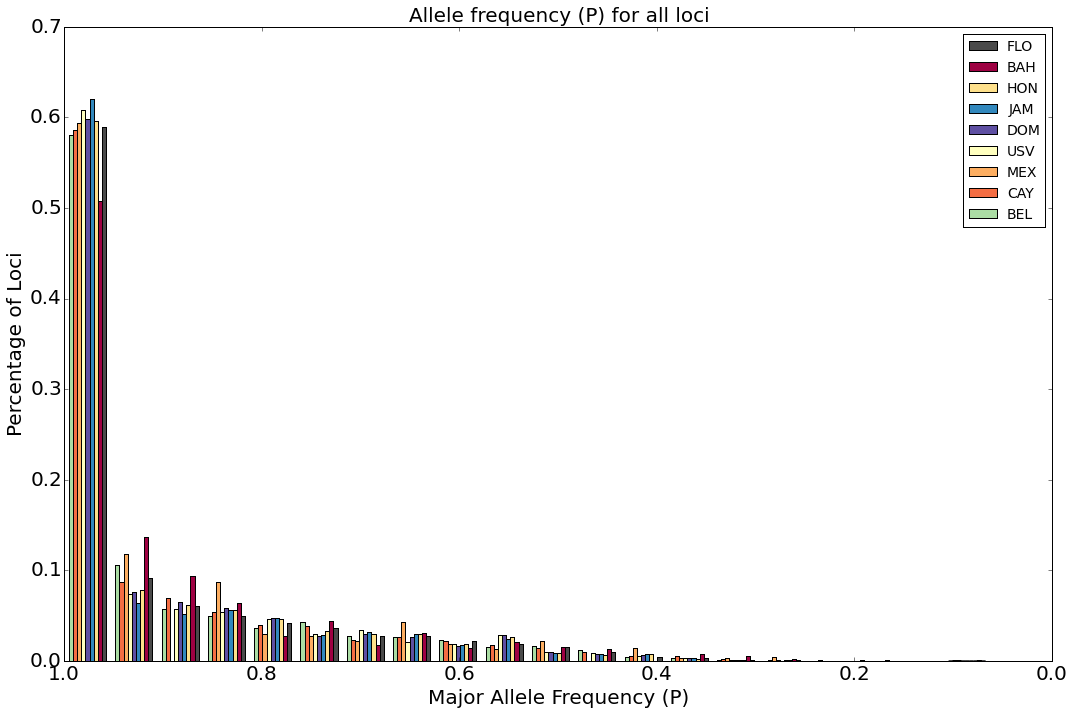

In [121]:
#Define which populations you want to plot: 
populations = ['FLO', 'BAH', 'HON', 'JAM', 'DOM', 'USV', 'MEX', 'CAY', 'BEL']
# populations = ['FLO', 'BAH','DOM', 'MEX', 'HON', 'JAM']
color_dict = {'CAY': '#F46D43', 'BEL': '#ABDDA4', 'DOM': '#5E4FA2', 'HON': '#FEE08B', 'NC': '#FF7F00', 'USV': '#FFFFBF', 
          'JAM': '#3288BD', 'FLO': '#4A4A4A', 'LIS': '#CAB2D6', 'BER': '#6A3D9A', 'MEX': '#FDAE61', 'BAH': '#9E0142'}

#Make a color list from dictionary in the appropriate order 
colors = []
for i in populations:
    new_color = color_dict[i]
    colors.append(new_color)

##Make a subplot figure space 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#Define the multiple datasets to plot in historgram 
input_dataframe = b9_p8_r80_sumstats
x_multi =[input_dataframe[input_dataframe['pop'] == pop].P for pop in populations]

#Define number of bins 
n_bins = 20

#Get all data in the weighted format you want to the frequencies all equal 1 
weights=[]
for a in x_multi:
    weight= np.ones_like(a)/float(len(a))
    weights.append(weight)

plt.hist(x_multi, n_bins, histtype='bar', color = colors, label = populations, weights=weights)

#Edit plot title and legent info 
ax.set_title('Allele frequency (P) for all loci', fontsize=20)
ax.legend(loc='upper right', fontsize=14, scatterpoints=1)
plt.xlim(1,0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Major Allele Frequency (P)', fontsize = 20)
plt.ylabel('Percentage of Loci', fontsize = 20)
plt.tight_layout()

fig.savefig('/Users/eleanorbors/Desktop/Manuscripts/Lionfish_ms1_modern/figures_for_paper/b9_p8_r80_SFS_all_loci.pdf', format='pdf', dpi=1000)

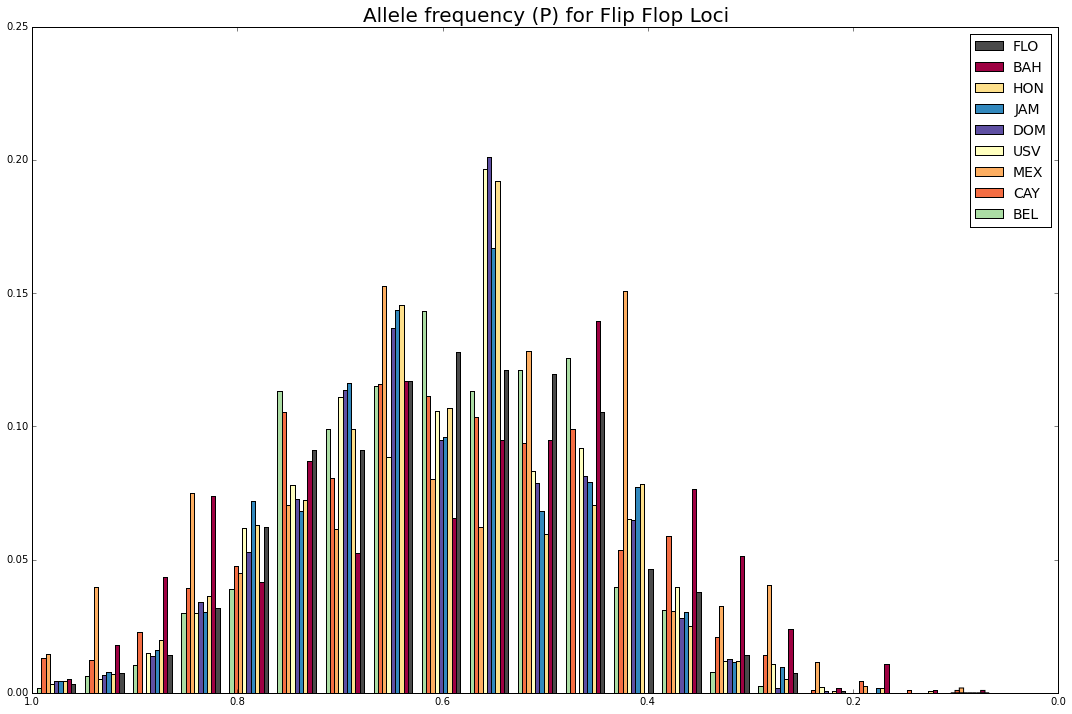

In [97]:
#Define which populations you want to plot: 
populations = ['FLO', 'BAH', 'HON', 'JAM', 'DOM', 'USV', 'MEX', 'CAY', 'BEL']
# populations = ['FLO', 'BAH','DOM', 'MEX', 'HON', 'JAM']
color_dict = {'CAY': '#F46D43', 'BEL': '#ABDDA4', 'DOM': '#5E4FA2', 'HON': '#FEE08B', 'NC': '#FF7F00', 'USV': '#FFFFBF', 
          'JAM': '#3288BD', 'FLO': '#4A4A4A', 'LIS': '#CAB2D6', 'BER': '#6A3D9A', 'MEX': '#FDAE61', 'BAH': '#9E0142'}

#Make a color list from dictionary in the appropriate order 
colors = []
for i in populations:
    new_color = color_dict[i]
    colors.append(new_color)

##Make a subplot figure space 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#Define the multiple datasets to plot in historgram 
input_dataframe = flip_flop_dic['flip_flop_df']
x_multi =[input_dataframe[input_dataframe['pop'] == pop].P for pop in populations]

#Define number of bins 
n_bins = 20

#Get all data in the weighted format you want to the frequencies all equal 1 
weights=[]
for a in x_multi:
    weight= np.ones_like(a)/float(len(a))
    weights.append(weight)

plt.hist(x_multi, n_bins, histtype='bar', color = colors, label = populations, weights=weights)

#Edit plot title and legent info 
ax.set_title('Allele frequency (P) for Flip Flop Loci ', fontsize=20)
ax.legend(loc='upper right', fontsize=14, scatterpoints=1)
plt.xlim(1,0)
plt.tight_layout()

#fig.savefig('b9_p8_r80_flip_flop_SFS.eps', format='eps', dpi=1000)

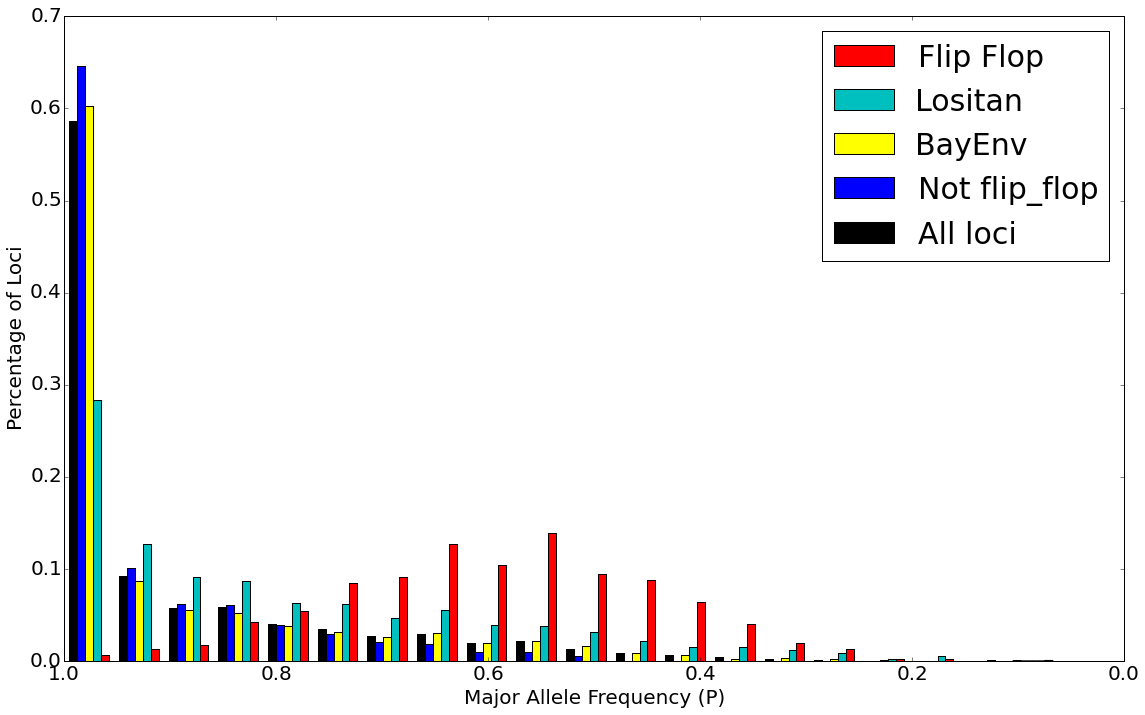

In [125]:

fig,ax=plt.subplots()
fig.set_size_inches(16, 10)
weights=[]
n_bins = 20
x_multi = [flip_flop_dic['flip_flop_df'].P, lositan_df.P, all_bayenv_5percent_sumstats.P, 
           flip_flop_dic['non_flip_flop_df'].P, b9_p8_r80_sumstats.P]

for a in x_multi:
    weight= np.ones_like(a)/float(len(a))
    weights.append(weight)

plt.hist(x_multi, weights=weights, bins=n_bins, color = ['r', 'c', 'yellow', 'blue', 'k'], 
        label = ['Flip Flop', 'Lositan','BayEnv', 'Not flip_flop', 'All loci'])
plt.xlim(1, 0)
plt.legend(fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Major Allele Frequency (P)', fontsize = 20)
plt.ylabel('Percentage of Loci', fontsize = 20)
plt.tight_layout()


plt.savefig('/Users/eleanorbors/Desktop/Manuscripts/Lionfish_ms1_modern/figures_for_paper/SFS_different_groups_of_loci.pdf', format = 'pdf')

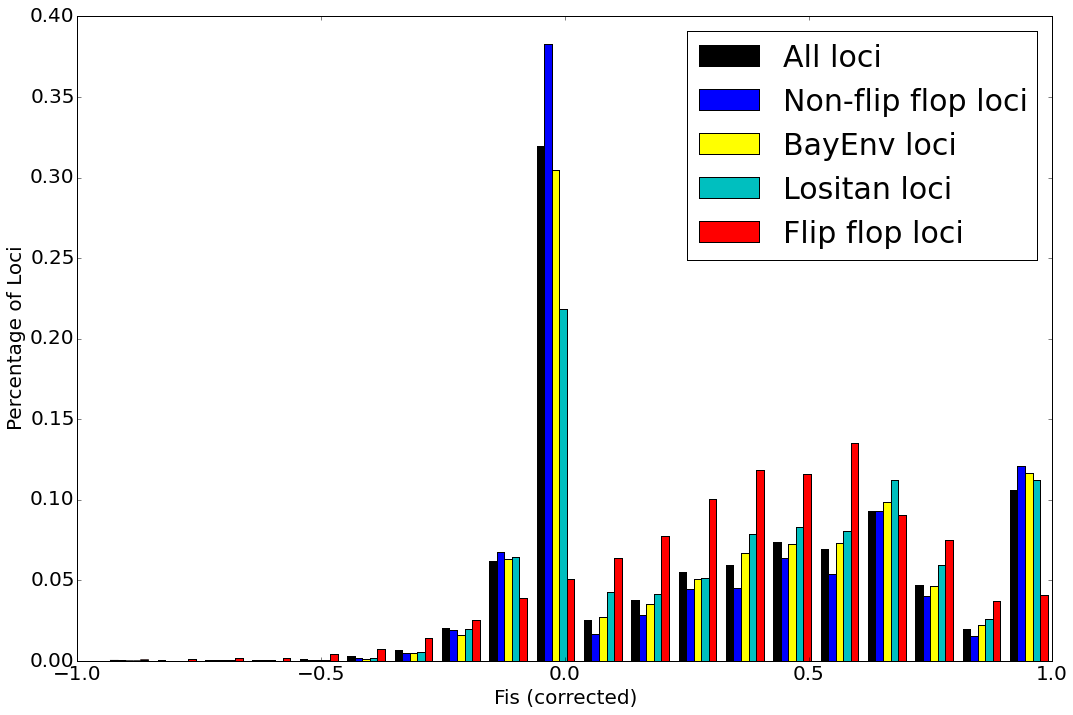

In [127]:

fig,ax=plt.subplots()
fig.set_size_inches(15, 10)
weights=[]
n_bins = 20
x_multi = [b9_p8_r80_sumstats.Fis_corrected.dropna(), 
           flip_flop_dic['non_flip_flop_df'].Fis_corrected.dropna(),
           all_bayenv_5percent_sumstats.Fis_corrected.dropna(), 
           lositan_df.Fis_corrected.dropna(),
           flip_flop_dic['flip_flop_df'].Fis_corrected.dropna()]

for a in x_multi:
    weight= np.ones_like(a)/float(len(a))
    weights.append(weight)

plt.hist(x_multi, weights=weights, bins=n_bins, color = ['k', 'blue', 'yellow', 'c', 'r'], 
        label = ['All loci', 'Non-flip flop loci', 'BayEnv loci', 'Lositan loci',
                 'Flip flop loci'])
plt.xlim(-1, 1)
plt.legend(fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Fis (corrected)', fontsize = 20)
plt.ylabel('Percentage of Loci', fontsize = 20)
plt.tight_layout()
plt.savefig('/Users/eleanorbors/Desktop/Manuscripts/Lionfish_ms1_modern/figures_for_paper/Fis_corrected_different_groups_of_loci.pdf', format = 'pdf')

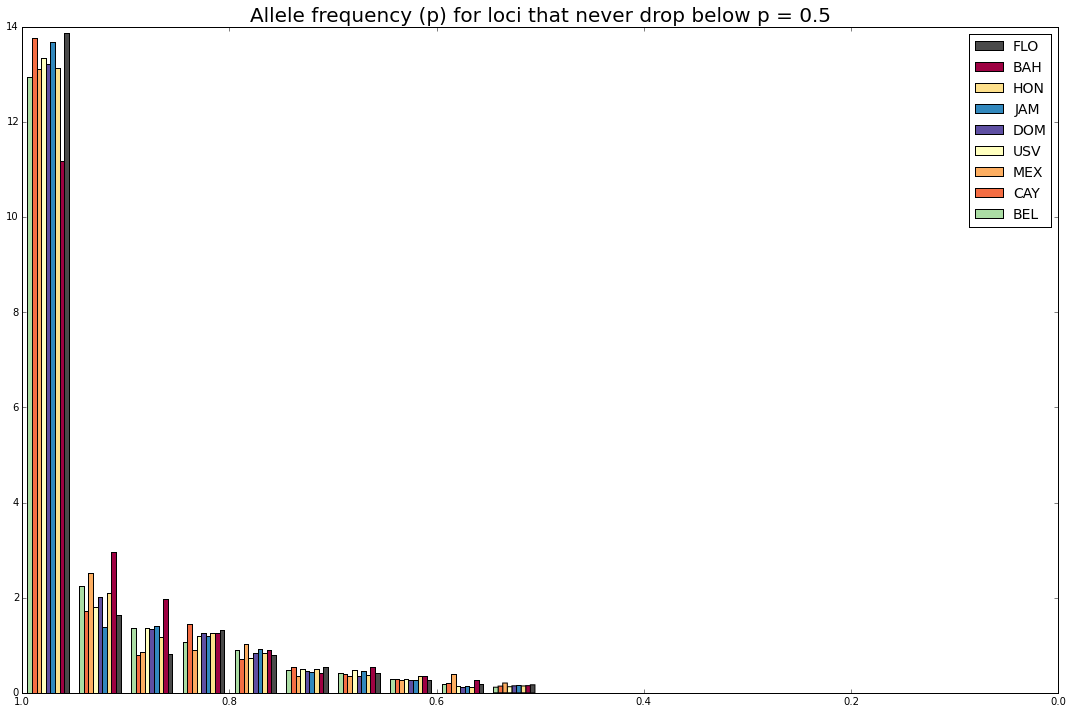

In [35]:
#JUST THE NON FLIP FLOPPERS
n_bins = 10
x = np.random.randn(1000, 3)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

input_dataframe = flip_flop_dic['non_flip_flop_df']
# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
x_multi = [input_dataframe[input_dataframe['pop'] == pop].P for pop in populations]
ax.hist(x_multi, n_bins, histtype='bar', color = colors,label = populations, normed = True)
ax.set_title('Allele frequency (p) for loci that never drop below p = 0.5', fontsize=20)

ax.legend(loc='upper right', fontsize=14, scatterpoints=1)

plt.xlim(1, 0)
plt.tight_layout()
plt.show()
#fig.savefig('b9_p8_r80_non_flip_flops_SFS.eps', format='eps', dpi=1000)